In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

In [3]:
path="/content/drive/MyDrive/dataset/Data.csv"
data = pd.read_csv(path)

# Basic info
print(data.head(10))
print(data.shape)
print(data.tail(3))

   age         workclass  fnlwgt     education  educational-num  \
0   25           Private  226802          11th                7   
1   38           Private   89814       HS-grad                9   
2   28         Local-gov  336951    Assoc-acdm               12   
3   44           Private  160323  Some-college               10   
4   18                 ?  103497  Some-college               10   
5   34           Private  198693          10th                6   
6   29                 ?  227026       HS-grad                9   
7   63  Self-emp-not-inc  104626   Prof-school               15   
8   24           Private  369667  Some-college               10   
9   55           Private  104996       7th-8th                4   

       marital-status         occupation   relationship   race  gender  \
0       Never-married  Machine-op-inspct      Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing        Husband  White    Male   
2  Married-civ-spouse    Protective-serv

In [4]:
print(data.isna().sum())

# Replace '?' with 'Others' for workclass and occupation
data['workclass'].replace({'?': 'Others'}, inplace=True)
data['occupation'].replace({'?': 'Others'}, inplace=True)

# Filter unwanted workclass categories
data = data[~data['workclass'].isin(['Without-pay', 'Never-worked'])]

# View updated counts
print(data['workclass'].value_counts())
print(data['occupation'].value_counts())


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64
occupation
Prof-specialty       6172
Craft-repair         6111
Exec-managerial      6085
Adm-clerical         5608
Sales                5503
Other-service        4921
Machine-op-inspct    3020
Others               2799
Transport-moving     2354
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-4-3092514746.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workclass'].replace({'?': 'Others'}, inplace=True)
/tmp/ipython-input-4-3092514746.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

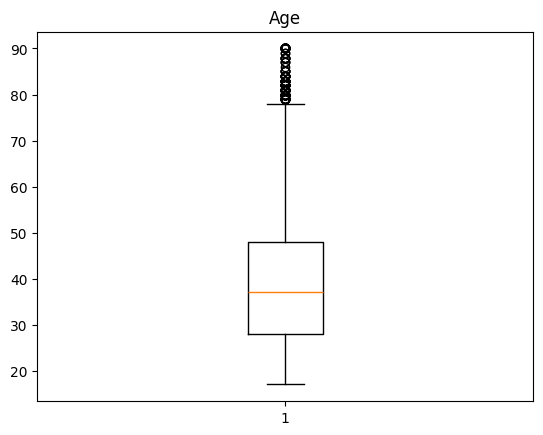

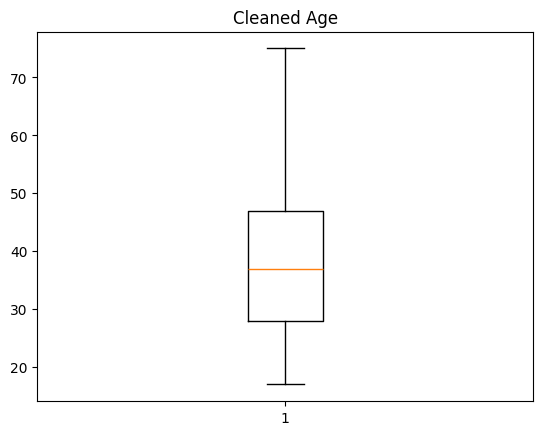

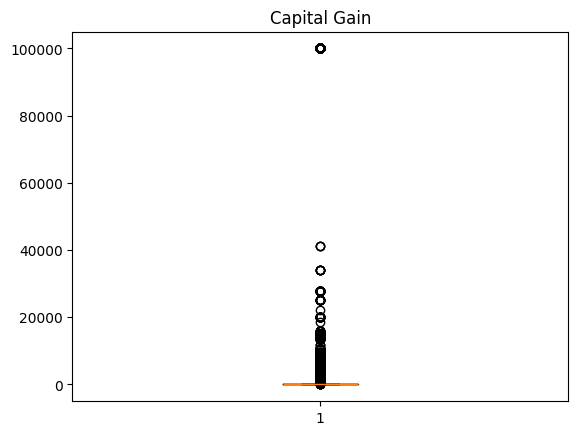

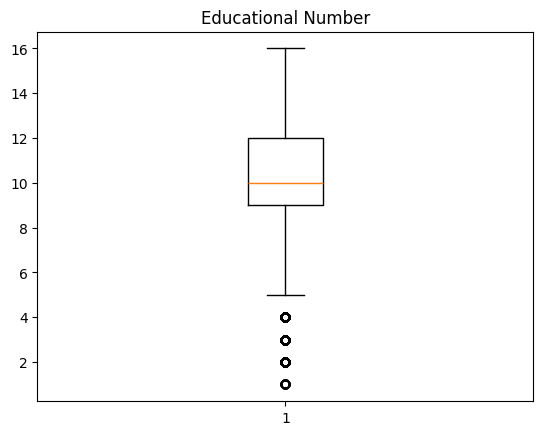

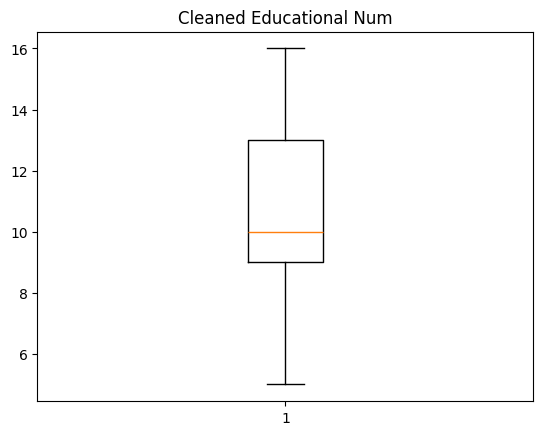

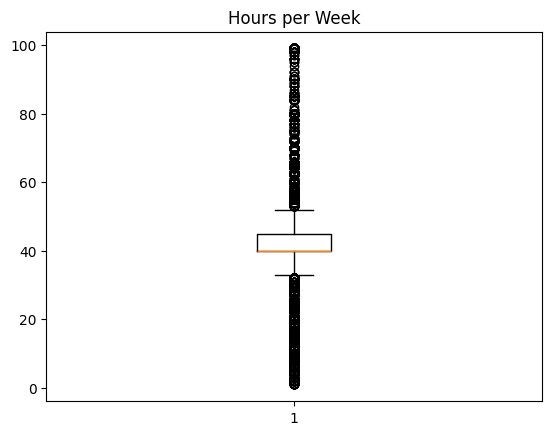

In [5]:
# Age
plt.boxplot(data['age']); plt.title("Age"); plt.show()
data = data[(data['age'] >= 17) & (data['age'] <= 75)]
plt.boxplot(data['age']); plt.title("Cleaned Age"); plt.show()

# Capital Gain
plt.boxplot(data['capital-gain']); plt.title("Capital Gain"); plt.show()

# Educational Num
plt.boxplot(data['educational-num']); plt.title("Educational Number"); plt.show()
data = data[(data['educational-num'] >= 5) & (data['educational-num'] <= 16)]
plt.boxplot(data['educational-num']); plt.title("Cleaned Educational Num"); plt.show()

# Hours Per Week
plt.boxplot(data['hours-per-week']); plt.title("Hours per Week"); plt.show()

In [6]:

# Drop redundant column
data.drop(columns=['education'], inplace=True)

In [7]:
encoder = LabelEncoder()

# Apply encoding
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [8]:
X = data.drop(columns=['income'])
y = data['income']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [11]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')
label_encoder = joblib.load('label_encoder.pkl') # Assuming you saved the encoder

st.title('Income Prediction App')

st.write("""
Enter the details below to predict income.
""")

# Collect user input
age = st.slider('Age', 17, 75, 30)
workclass = st.selectbox('Workclass', ['Private', 'Self-emp-not-inc', 'Local-gov', 'Others', 'State-gov', 'Self-emp-inc', 'Federal-gov'])
fnlwgt = st.number_input('Fnlwgt', min_value=0)
educational_num = st.slider('Educational Number', 5, 16, 10)
marital_status = st.selectbox('Marital Status', ['Never-married', 'Married-civ-spouse', 'Divorced', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'])
occupation = st.selectbox('Occupation', ['Prof-specialty', 'Craft-repair', 'Exec-managerial', 'Adm-clerical', 'Sales', 'Other-service', 'Machine-op-inspct', 'Others', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Priv-house-serv', 'Armed-Forces'])
relationship = st.selectbox('Relationship', ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife', 'Other-relative'])
race = st.selectbox('Race', ['Black', 'White', 'Asian-Pac-Islander', 'Other', 'Amer-Indian-Eskimo'])
gender = st.selectbox('Gender', ['Male', 'Female'])
capital_gain = st.number_input('Capital Gain', min_value=0)
capital_loss = st.number_input('Capital Loss', min_value=0)
hours_per_week = st.number_input('Hours per Week', min_value=0)
native_country = st.selectbox('Native Country', ['United-States', 'Mexico', 'Philippines', 'Germany', 'Canada', 'Puerto-Rico', 'El-Salvador', 'India', 'Cuba', 'England', 'Jamaica', 'South', 'China', 'Italy', 'Dominican-Republic', 'Vietnam', 'Guatemala', 'Columbia', 'Poland', 'Japan', 'Taiwan', 'Haiti', 'Iran', 'Portugal', 'Nicaragua', 'Peru', 'Greece', 'Ecuador', 'France', 'Ireland', 'Hong', 'Trinadad&Tobago', 'Cambodia', 'Laos', 'Thailand', 'Yugoslavia', 'Outlying-US(Guam-USVI-etc)', 'Hungary', 'Honduras', 'Scotland']) # Add all unique native countries

# Create a dataframe from user input
input_data = pd.DataFrame({
    'age': [age],
    'workclass': [workclass],
    'fnlwgt': [fnlwgt],
    'educational-num': [educational_num],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'capital-gain': [capital_gain],
    'capital-loss': [capital_loss],
    'hours-per-week': [hours_per-week],
    'native-country': [native_country]
})

# Encode categorical features
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for col in categorical_cols:
    input_data[col] = label_encoder.transform(input_data[col])

# Scale the input data
input_data_scaled = scaler.transform(input_data)

# Make prediction
if st.button('Predict Income'):
    prediction = model.predict(input_data_scaled)
    if prediction[0] == '>50K':
        st.success('Predicted Income: >50K')
    else:
        st.success('Predicted Income: <=50K')

Overwriting app.py
